In [1]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [5]:
#read the csv file
df = pd.read_csv("C:/Users/stanl/Downloads/advertising.csv")
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [6]:
#get the general information of the dataset(to be used to influence the next course of action)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [7]:
#view the correlation between features and target
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


In [9]:
#define the independent variables and the dependent variables
X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']        

In [10]:
#split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
#create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [12]:
#make predictions
y_pred = model.predict(X_test)

In [13]:
#evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R2 score: {r2_score}')

Mean Squared Error: 2.907756910271091
R2 score: <function r2_score at 0x000002701EFC6840>


In [14]:
# view the coefficients/intercept
print(f'Coefficients: {model.coef_}')
print(f'Intercept: {model.intercept_}')

Coefficients: [0.05450927 0.10094536 0.00433665]
Intercept: 4.714126402214134


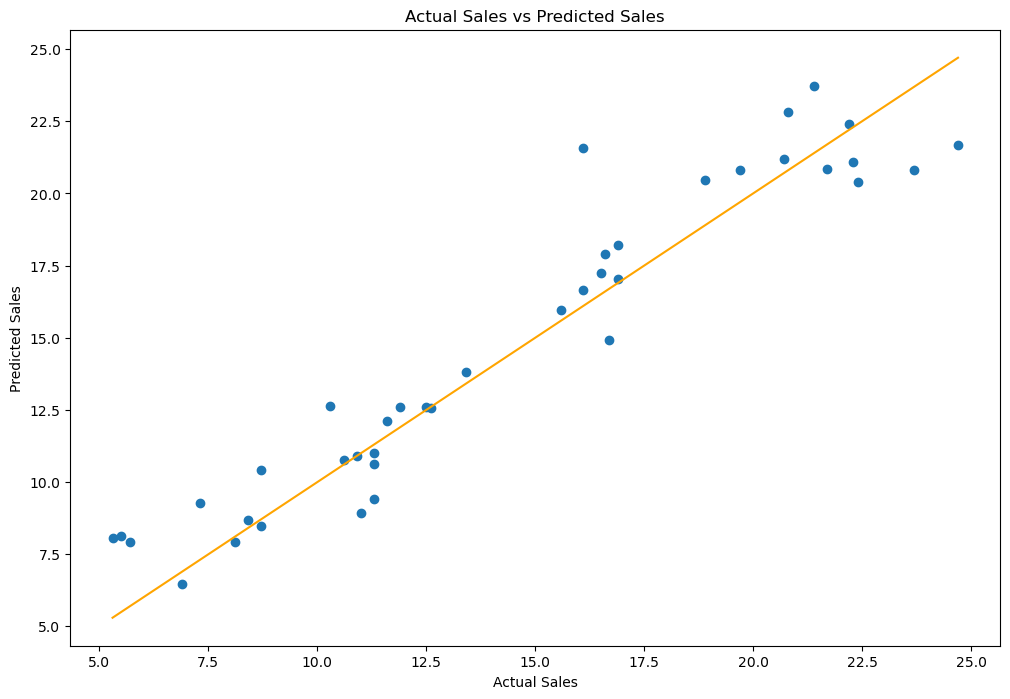

In [20]:
# visualizing the actual sales vs predicted sales for better understanding
plt.figure(figsize=(12, 8))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual Sales vs Predicted Sales')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='orange')
plt.show()